# Integrate

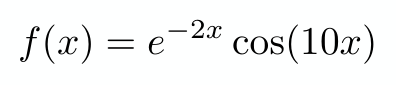

Using Trapazoid, Simpson's, and Romberg Integration

## Trapezoid 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# define the function 

def function(x): #f(x) takes a set of values 
    a = 2
    b = 10
    return np.exp(-a*x)*np.cos(b*x) #returns a properformat 

In [ ]:
def function_integral(x): #F(x) : Used to check if our aproximation is correct 
   
    return (1/52)*(np.exp(-2*x)*(5*np.sin(10*x)-np.cos(10*x)))

In [ ]:
def trapezoid_core(f, x, h):
    return 0.5*h*(f(x+h) + f(x))

In [ ]:
def trapezoid_method(f, a, b, N): 
    #f == function to integrate 
    #a == lower limit of integration
    #b == upper limit of integration 
    #N == number of function evaluations to use 
    
    #define x values to perform the trapezoid rule 
    
    x = np.linspace(a, b, N) #create the x-axis (start,stop,# of steps)
    h = x[1]- x[0]           #since linspace evenly speaced them out 
                             #we only need the change in the first and 2nd values
                             #neat-o 
    
    #define the value of the integral ...still.. why? 
    Fint = 0.0 
    
    #perform the integral using the trapezoid method 
    
    #this is our summation wow-eee 
    
    for i in range(0,len(x)-1,1):        #this is calling from an index of the array
        Fint += trapezoid_core(f,x[i],h) #once you have your index, input the value into the function
        
    #return the answer 
    
    
    return Fint                          #after all iterations are done, returun last result 

# Simpson's 

In [ ]:
def simpson_core(f,x,h):  #takes a function,and two values 
    
    return h*( f(x) + 4*f(x+h) + f(x+2*h))/3. 

#very very important note
#the core is already accounting for the values 
#1/3f(x_i) + 4/3f(x_(i+1)) + 1/3f(x_(i+2)) Mah fucking god  

#returns an interval evaluation 


In [ ]:
def simpsons_method(f,a,b,N): 
    #f == function to integrate 
    #a == lowre limit of integration
    #b == upper limit of integration 
    #N == number of function evauations to use 
    # note if N is odd, then we don't need to adjust the
    # the last segment
    
    #define the x values to preform the simpsons rule 
    x = np.linspace(a,b,N)
    h = x[1]-x[0]          #same as Trapzoid, linspace is even, so just take first 2
    
    #define the value of the integral ..why?
    Fint = 0.0 
    
    #preform the integral using simpson's Method 
    for i in range(0,len(x)-2, 2): 
        Fint += simpson_core(f,x[i], h)
        
        
    #apply simpson's rule over the last interval
    #if N is even 
    if (N%2) == 0: #rule for even modulus 
        Fint += simpson_core(f,x[-2], 0.5*h)

    return Fint

# Romberg

In [ ]:
def romberg_core(f,a,b,i): 
    
    #we need the difference b-a 
    h = b-a 
    
    #and the increment between nnew function evaluatoins
    dh = h/2.**(i)
    
    #we need the cofactor .. why is the h here 
    K = h/2.**(i+1)
    
    #and the function evaluations 
    M = 0.0 
    for j in range(2**i): 
        M += f(a + 0.5*dh + j*dh)
        
    #return the answer
    return K*M 

In [ ]:
def romberg_integration(f,a,b,tol):
    
    #define an iteration variable 
    i = 0 
    
    #define a maximum number of iterations
    imax = 1000
    
    #define an error estimate, set to a large value 
    delta = 100.0*np.fabs(tol)
    
    #set an array of integral answers 
    I  = np.zeros(imax, dtype=float)
    
    #get the zeroth romberg iteration
    I[0] = 0.5*(b-a)*(f(a)+f(b))
    
    #iterate by 1 
    i += 1 
    
    while (delta>tol): 
        
        #find this romberg iteration 
        I[i] = 0.5*I[i-1] + romberg_core(f,a,b,i)
        
        #compute the new fractional error estimate 
        delta = np.fabs( (I[i]- I[i-1])/I[i] )
        
        #print(i,I[i],I[i-1],delta)
        
        if delta>tol: 
            
            #iterate 
            i += 1 
            
            #if we've reached the max, iterations 
            
            if i>imax: 
                print("Max iterations reached.")
                raise StopIteration('Stopping iterations after', i )
                
    print(f'Iterations: {i}')
    return I[i]
    

# Test 

In [ ]:
Answer = function_integral(np.pi) - function_integral(0)
print(f"True Answer = {Answer}")


print('\nTrapezoid Solution:')
print(trapezoid_method(function,0,np.pi,2928))

trap_answer = trapezoid_method(function, 0, np.pi, 2928)
trap_error = (np.fabs(trap_answer-Answer))/Answer

print('\tError = %.2e'  %trap_error) 
print('\tAmount of Intervals: 2928')

print('\nSimpson Solution:')
print(simpsons_method(function,0,np.pi,205))

sim_answer = simpsons_method(function, 0, np.pi, 205)
sim_error = np.fabs((sim_answer-Answer))/Answer

print('\tError = %.2e'  %sim_error)
print('\tAmount of Intervals: 205')


print("\nRomberg Solution:")

tolerance = 1.0e-6

#RI = romberg_integration(function, 0, np.pi, tolerance)
#print(RI)
#print(f'Tolerance: %.2e' %tolerance)

### Not sure why my Romberg solution, at 1.0e-6 causes it to take so long to compute 

The process is faster if the tolerance is within e-4 

See example below: 

In [ ]:
print("\nRomberg Solution:")

tolerance = 1.0e-4

RI = romberg_integration(function, 0, np.pi, tolerance)
print(RI)
print(f'Tolerance: %.2e' %tolerance)